<a href="https://colab.research.google.com/github/virf96/Chat-Bot/blob/master/DatosFaltantes_SustitucionValorArbitrario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sustitución por valores arbitrarios o valores constantes

Los métodos de imputación consisten en estimar los valores faltantes en base a los valores existentes de la variable. El objetivo de cualquier método de imputación es producir un **conjunto completo** de datos que pueda ser utilizado por un algoritmo de aprendizaje de máquina. 


Como su nombre lo indica, la sustitución por valores arbitrarios consiste en reemplazar los valores nulos por un valor cualquiera, arbitrario. Típicamente se usan valores como  0, 999, -999 (u otras combinaciones de 9s) o -1 (si la distribución es positiva).

### Cuáles variables se pueden sustituir con valores arbitrarios o constantes?

Variables categóricas o numéricas pueden ser sustituidas por valores arbitrarios

Para variables categóricas, es equivalente a reemplazar los valores nulos por una etiqueta adicional, lo cual es una práctica bastante común, por lo tanto lo veremos en otro notebook.

### Condiciones

- MNAR - Los datos no faltan de forma aleatoria

Si este es el caso, queremos comunicar que estos valores nulos son diferentes y por lo tanto los reemplazamos con un valor arbitrario y no con la media/mediana que representan los valores más comunes.


### Ventajas

- Fácil de implementar
- Forma rápida de obtener conjuntos completos de datos
- Puede ser integrado en producción (durante el despliegue del modelo)
- Captura la importancia de la 'ausencia' (si existe)

### Limitaciones

- Distorsión de la distribución original de la variable
- Distorsión de la varianza original
- Distorsión de la covarianza con las otras variables en los datos.
- Si el valor arbitrario es al final de la distribución puede generar valores extremos
- El 'valor arbitrario' seleccionado debe ser escogido cuidadosamente para que no sea similar a otros valores comunes en los datos/distribución (media, mediana, moda)



### Cuando usar la sustitución por valor arbitrario?

Sustituir los valores nulos por un valor arbitrario se debe usar cuando hay razones suficientes para suponer que los datos no faltan al azar. En situaciones como estas, queremos resaltar que los datos faltantes. Por lo tanto no se sustituyen los valores por la media/mediana u otro valor común, sino por el contrario por un valor arbitrario o constante que muestre esa diferencia.

### Nota final

Cuando las variables son capturadas por terceras partes, como agencias de crédito, dichas organizaciones usan valores arbitrarios para resaltar los valores ausentes.
 
## En este demo:

Vamos a aprender como sustituir valores nulos con valores arbitrarios utilizando pandas y el Ames House Price y los datos del Titanic.

- Para bajar los datos, por favor referirse a la clase en **Datasets** en la  **Sección 1** del curso.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Carguemos el set de datos Titanic con una selección de variables

data = pd.read_csv('/content/drive/My Drive/datasets/titanic.csv', usecols=['age', 'fare', 'survived'])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [4]:
# porcentaje de valores nulos 
#20% de valores nulos en "age"

data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

### Para tener en cuenta

Los parámetros para la sustitución o imputación se deben aprender sobre el set de datos de entrenamiento, usado para entrenar el modelo. Luego estos mismos parámetros se utilizan para imputar valores nulos en el set de prueba. Y esto es para evitar sobre-ajustes.

Cuando se sustituyen valores nulos por valores arbitrarios, esta condición no es tan importante, ya que escogemos el valor arbitrariamente. Sin embargo, es bueno adherirse a esta premisa en la práctica y seleccionar el valor arbitrario analizando la distribución de la variable en el set de entrenamiento.


In [5]:
# Separemos en sets de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],  # variables independientes
    data['survived'],  # target
    test_size=0.3,  # porcentaje de obs en test set
    random_state=0)  # semilla para reproducibilidad

X_train.shape, X_test.shape

((916, 2), (393, 2))

In [6]:
# exploremos datos nulos en el segmento de entrenamiento
# el porcentaje debe ser similar que para todo el 
# conjunto de datos

#El porcentaje de valores nulos ha disminuido debido a que estamos trabajando con el 70% de los datos (train)

X_train.isnull().mean()    

age     0.191048
fare    0.000000
dtype: float64

In [7]:
# creemos una función para sustituir los valores faltantes
# con un valor arbitrario

# la función toma como argumentos:
# dataframe, variable, y el valor de arbitrario para la sustitución
# retorna la variable con los valores sustituidos


def impute_na(df, variable, value):

    return df[variable].fillna(value)

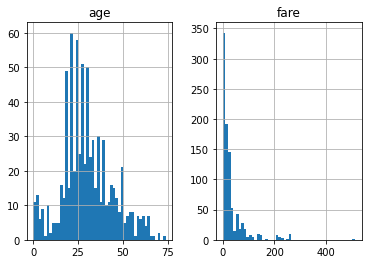

In [9]:
# exploremos la distribución de la variable 
# para seleccionar el valor arbitrario

#Notamos que "AGE" es una distribución medianamente centrada
#Notamos que "fare" es una ditribución sesgada a la izquierda

X_train.hist(bins=50)
plt.show()

In [10]:
# En este demo vamos a usar dos valores arbitrarios para la 
# sustitución de los valores nulos en la variable 'age', compararemos los 2 resutados
# uno al final de la distribución ==> 99
# y el otro -1, ya que age no toma valores negativos

# primero imputamos con 99
X_train['age_99'] = impute_na(X_train, 'age', 99)

# luego imputamos con -1
X_train['age_minus1'] = impute_na(X_train, 'age', -1)

X_train.head(15)

,age,fare,age_99,age_minus1
501,13.0,19.5000,13.0,13.0
588,4.0,23.0000,4.0,4.0
402,30.0,13.8583,30.0,30.0
1193,NaN,7.7250,99.0,-1.0
686,22.0,7.7250,22.0,22.0
971,NaN,7.8792,99.0,-1.0
117,30.0,56.9292,30.0,30.0
540,2.0,26.0000,2.0,2.0
294,49.0,110.8833,49.0,49.0
261,35.0,26.2875,35.0,35.0


Compara las filas con datos ausentes (NaN) en age, y observa como esos valores fueron reemplazados ya sea por 99 o -1.

In [11]:
# vemos como la varianza cambia luego de la sustitución con culaquiera de los 2 métodos
# esto es de esperarse, porque el porcentaje de valores ausentes 
# es relativamente grande en age, ~20%

print('Varianza variable original: ', X_train['age'].var())
print('Varianza luego de sustitución por 99: ', X_train['age_99'].var())
print('Varianza luego de sustitución por -1: ', X_train['age_minus1'].var())

Varianza variable original:  194.16304666581854
Varianza luego de sustitución por 99:  888.7051993280891
Varianza luego de sustitución por -1:  307.9400526938762


De hecho, el efecto de la varianza es influenciado por la magnitud del valor arbitrario seleccionado para la sustitución: comparen 99 con -1.

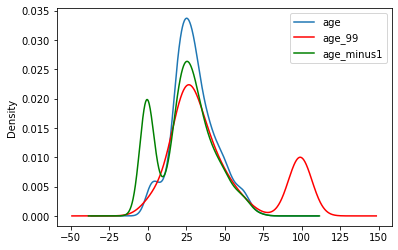

In [12]:
# Comparemos distribuciones

#Observamos las siguientes cosas:
#La sustitución con 99 concentra los valores al final de la distribución
#La sustitución con -1 concentra los valores al inicio de la distribución
#Cualquiera de los 2 métodos altera drámaticamente la distribución original

fig = plt.figure()
ax = fig.add_subplot(111)

# distribución original de la variable
X_train['age'].plot(kind='kde', ax=ax)

# distribución variable sustituida con 99
X_train['age_99'].plot(kind='kde', ax=ax, color='red')

# distribución variable sustituida con -1
X_train['age_minus1'].plot(kind='kde', ax=ax, color='green')

# etiquetas
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

La sustitución por valores arbitrarios distorsiona la distribución original de la variable y como es de esperarse, la variable transformada tiene más valores alrededor del valor arbitrario seleccionado. 

**Es esto importante?**

Depende del algoritmo de machine learning seleccionado para construir el modelo.
Los modelos lineales asumen que las variables están normalmente distribuidas. La sustitución por valores arbitrarios puede distorsionar la distribución normal original si el porcentaje de valores ausentes es alto y por lo tanto afectar el desempeño del modelo lineal.


Por el contrario, esta técnica funciona muy bien para los algoritmos basados en árboles.


In [13]:
# esta técnica también puede afectar la relación de la variable imputada
# con las otras variables en los datos

# examinemos para ello la covarianza

X_train[['fare', 'age', 'age_99', 'age_minus1']].cov()

,fare,age,age_99,age_minus1
fare,2248.326729,136.176223,-38.722001,177.733891
age,136.176223,194.163047,194.163047,194.163047
age_99,-38.722001,194.163047,888.705199,-175.265319
age_minus1,177.733891,194.163047,-175.265319,307.940053


Podemos ver que la covariance entre Age y Fare cambio después de la sustitución.

Veamos como ha afectado la imputación al coeficiente de correlación

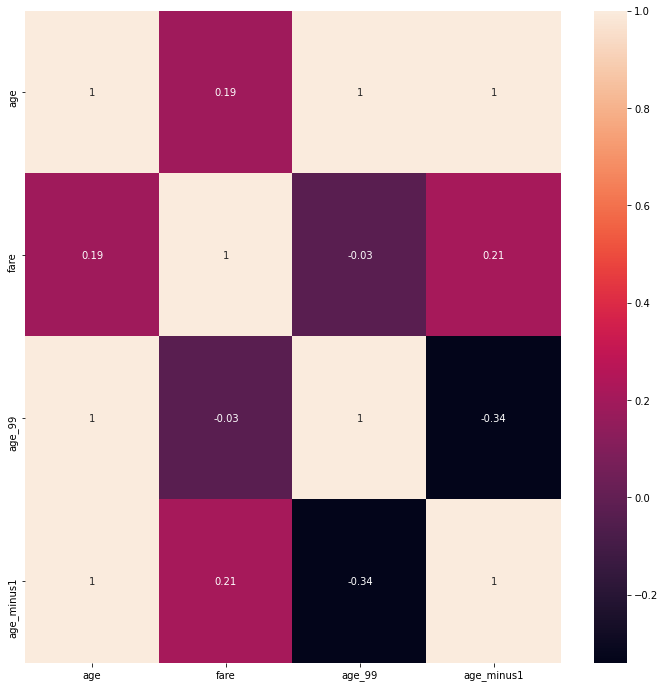

In [14]:
# redondeando los valores a 2 decimales
import seaborn as sns
features = X_train.columns
correlation_matrix = X_train[features].corr().round(2)

# Grafiquemos la matriz de correlación usando seaborn
# annot = True para imprimir los coeficientes de correlación


#Podemos ver que la relación de las variables creadas con la variable "fare" cambio notoriamente
figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True)

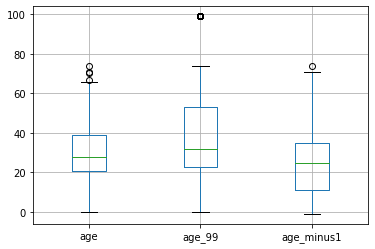

In [15]:
# Finalmente, la sustitución arbitraria también puede
# generar observaciones que siendo completamente normales parecen
# valores extremos

# o en otras palabras la sustitución puede alterar
# el número percibido de valores extremos


# Gráfico de caja
X_train[['age', 'age_99', 'age_minus1']].boxplot()

De la gráfica anterior, podemos ver después de la sustitución hay más valores extremos hacia los valores altos de Age, pero también para los valores inferiores.


## House Prices Dataset

Repitamos rápidamente el mismo ejercicio con el House Prices dataset; este tiene variables con pocos o muchos valores nulos, por lo tanto podemos comparar el efecto de la sustitución en ambos escenarios.


In [16]:
# Vamos a usar las siguientes variables
# 3 de las cuales tienen valores nulos

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [17]:
# House Prices dataset
data = pd.read_csv('/content/drive/My Drive/datasets/houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [18]:
# variables con valores nulos

# en la siguiente list comprehension, iteraremos sobre las columnas
# y seleccionaremos las que contienen valores nulos

[var for var in data.columns if data[var].isnull().sum() > 0]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [20]:
# porcentaje de valores nulos
#17% de valores nulos en "LotFrontage"
#.005 de valores nulos en "MasVnrArea"
# 5% de valores nulos en "GarageYrBlt"
data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

Primero, separemos los datos en entrenamiento y prueba



In [21]:
# separemos los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 10), (438, 10))

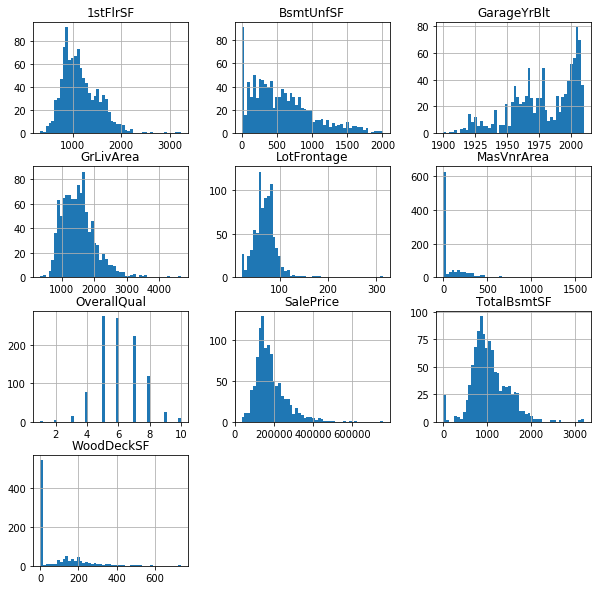

In [ ]:
# distribuciones de las variables
#Podemos notar que:
#'LotFrontage' esta sesgada a la izquierda
#'MasVnrArea' esta sesgada a la derecha
#'GarageYrBlt' esta sesgada a la derecha
X_train.hist(bins=50, figsize=(10,10))
plt.show()

In [22]:
# empecemos con la variable LotFrontage

# vamos a crear una nueva variable sustituyendo los valores nulos
# con el valor 999 

# en este caso 999 es seleccionado para posicionar los valores
# al extremo derecho de la distribución 
# ya que podemos ver del histograma anterior que LotFrontAge 
# toma valores de hasta 300


X_train.loc[:,'LotFrontage_imputed'] = impute_na(X_train, 'LotFrontage', 999)
X_test.loc[:,'LotFrontage_imputed'] = impute_na(X_test, 'LotFrontage', 999)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [23]:
# MasVnrArea tiene valores de hasta 1500, por lo tanto, 999 no
# funcionaría como valor para sustituir con esta variable.
# usaremos 2999

X_train.loc[:,'MasVnrArea_imputed'] = impute_na(X_train, 'MasVnrArea', 2999)
X_test.loc[:,'MasVnrArea_imputed'] = impute_na(X_test, 'MasVnrArea', 2999)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


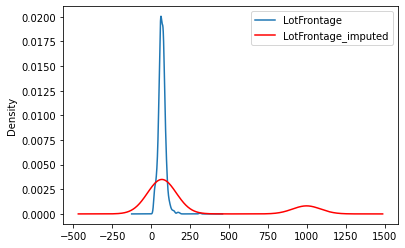

In [24]:
# evaluemos el efecto de la sustitución en las distribuciones

# Vemos como en la variable imputada hay una acumulación de valores
# hacia el extremo derecho de LotFrontAge

fig = plt.figure()
ax = fig.add_subplot(111)

# distribución original
X_train['LotFrontage'].plot(kind='kde', ax=ax)

# variable sustituida 
X_train['LotFrontage_imputed'].plot(kind='kde', ax=ax, color='red')

# etiquetas
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

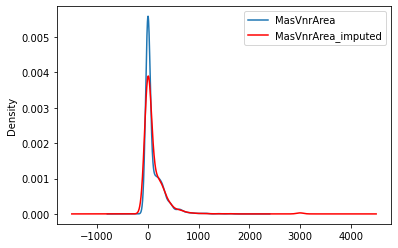

In [25]:
# Como el porcentaje de valores nulos para MasVnrArea, 
# era menor, el cambio en la distribución es menor

fig = plt.figure()
ax = fig.add_subplot(111)


# distribución original
X_train['MasVnrArea'].plot(kind='kde', ax=ax)

# variable sustituida con 2999
X_train['MasVnrArea_imputed'].plot(kind='kde', ax=ax, color='red')

# etiquetas
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Podemos observar de las gráficas anteriores que la distribución de LotFrontAge cambió dramáticamente, a diferencia de MasVnrArea. Esto se debe a que el % de valores nulos en la segunda variable es pequeño. Sin embargo, dependiendo del valor arbitrario seleccionado, la distribución se puede afectar más o menos.


Finalmente, podemos ver en el demo, que el proceso de seleccionar valores arbitrarios es bastante manual. Primero, tenemos que observar la distribución de cada variable, identificar los valores mínimos o máximos y finalmente seleccionar un valor que se acomode a cada variable para sustituir los valores nulos.  Una alternativa para automatizar este proceso, es seleccionar los valores arbitrarios siempre al extremo de la distribución, como veremos en el siguiente notebook

In [27]:
# veamos ahora el efecto de la sustitución
# en la varianza

# Para LotFrontAge hay un cambio significativo ya que el porcentaje
# de valores nulos es alto, ~20%

print('Original Variance: ', X_train['LotFrontage'].var())
print('Variance after imputation: ', X_train['LotFrontage_imputed'].var())

Original Variance:  532.5872021885676
Variance after imputation:  130742.07296576179


In [28]:
# Lo mismo sucede para MasnVnrArea, a pesar que el % de valores nulos es bajo,
# el valor arbitrario seleccionado es mucho más alto, lo cual influye
# en la varianza 

print('Varianza original: ', X_train['MasVnrArea'].var())
print('Varianza despues de sustitución: ', X_train['MasVnrArea_imputed'].var())

Varianza original:  32983.538710039466
Varianza despues de sustitución:  73677.02879932376


In [29]:
# Exploremos la covarianza:
# tómate el tiempo de comparar los valores en la tabla

X_train.cov()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice,LotFrontage_imputed,MasVnrArea_imputed
LotFrontage,532.587202,6.587119,6.805603e+02,9.496573e+02,2.908856e+03,3.379794e+03,3.919952e+03,30.611717,1.347414e+02,6.689645e+05,532.587202,7.585010e+02
OverallQual,6.587119,1.843859,1.014970e+02,1.746147e+02,2.886241e+02,2.242973e+02,4.091242e+02,17.902809,3.168557e+01,8.320132e+04,-18.279174,1.140556e+02
MasVnrArea,680.560330,101.496976,3.298354e+04,7.540788e+03,2.478877e+04,2.086595e+04,3.520785e+04,1203.583792,3.208924e+03,6.836439e+06,1582.711167,3.298354e+04
BsmtUnfSF,949.657293,174.614725,7.540788e+03,1.875241e+05,7.513307e+04,4.987449e+04,5.203392e+04,1823.065167,-1.833201e+03,6.833028e+06,-19005.620715,8.391605e+03
TotalBsmtSF,2908.855504,288.624075,2.478877e+04,7.513307e+04,1.682931e+05,1.212079e+05,8.615192e+04,3173.042442,1.227966e+04,2.003928e+07,1620.452017,2.503117e+04
1stFlrSF,3379.793504,224.297266,2.086595e+04,4.987449e+04,1.212079e+05,1.398656e+05,1.044401e+05,2009.195552,1.109406e+04,1.783631e+07,7485.021442,1.971276e+04
GrLivArea,3919.951834,409.124216,3.520785e+04,5.203392e+04,8.615192e+04,1.044401e+05,2.681277e+05,2738.982988,1.558395e+04,2.934477e+07,9634.034363,3.694487e+04
GarageYrBlt,30.611717,17.902809,1.203584e+03,1.823065e+03,3.173042e+03,2.009196e+03,2.738983e+03,624.305948,6.658911e+02,9.309355e+05,45.643154,1.588757e+03
WoodDeckSF,134.741376,31.685571,3.208924e+03,-1.833201e+03,1.227966e+04,1.109406e+04,1.558395e+04,665.891118,1.648582e+04,3.029981e+06,5377.154974,2.664993e+03
SalePrice,668964.454191,83201.317781,6.836439e+06,6.833028e+06,2.003928e+07,1.783631e+07,2.934477e+07,930935.489321,3.029981e+06,6.105731e+09,950743.964420,7.152962e+06


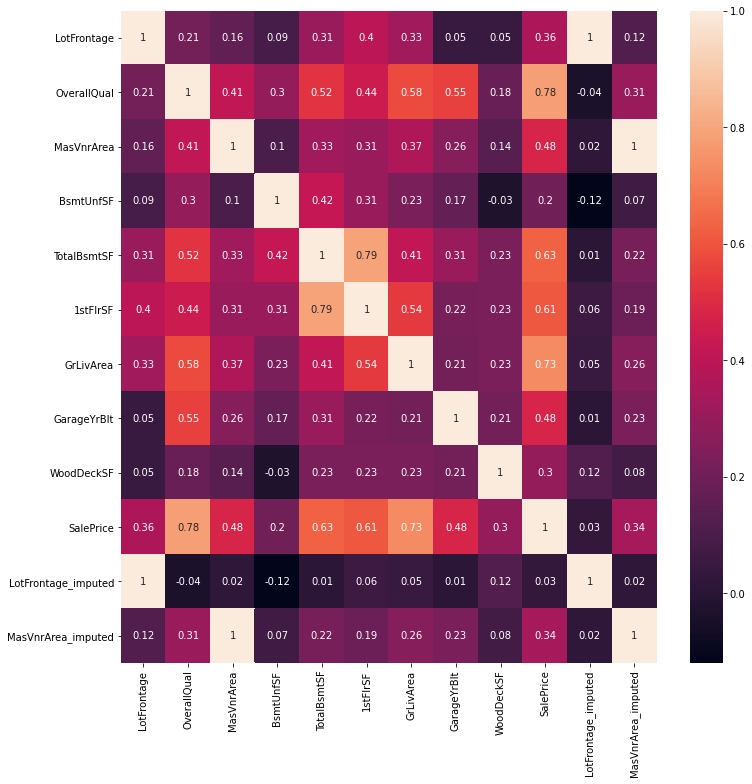

In [30]:
# redondeando los valores a 2 decimales
import seaborn as sns
features = X_train.columns
correlation_matrix = X_train[features].corr().round(2)

# Grafiquemos la matriz de correlación usando seaborn
# annot = True para imprimir los coeficientes de correlación


#Podemos ver que la relación de las variables si cambia al imputar valores arbitrarios.
figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True)